# Project: Investigate a Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Soccer Database (original source on Kaggle https://www.kaggle.com/hugomathien/soccer)

This soccer database comes from Kaggle and is well suited for data analysis and machine learning. It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. 

- The database is stored in a SQLite database. You can access database files using software like DB Browser.
- This dataset will help you get good practice with your SQL joins. Make sure to look at how the different tables relate to each other.
- Some column titles should be self-explanatory, and others you’ll have to look up on Kaggle

This project tries to answer the following questions:

1. What teams improved the most over the time period? 
2. Which players had the most penalties? 
3. What team attributes lead to the most victories?

In [1]:
import pandas as pd
import sqlite3
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


###  Table 1. Query Match History for Reseach Question 1

In [2]:
conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()

In [3]:
match = pd.read_sql("""
SELECT  Match.id, 
        Country.name AS country, 
        League.name AS league, 
        season, 
        stage, 
        date,
        HT.team_long_name AS home_team,
        AT.team_long_name AS away_team,
        home_team_goal, 
        away_team_goal                                        
FROM    Match
JOIN    Country on Country.id = Match.country_id
JOIN    League  on League.id  = Match.league_id
LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
""", conn)
match.head()

,id,country,league,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KRC Genk,Beerschot AC,1,1
1,2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,SV Zulte-Waregem,Sporting Lokeren,0,0
2,3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,KSV Cercle Brugge,RSC Anderlecht,0,3
3,4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KAA Gent,RAEC Mons,5,0
4,5,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,FCV Dender EH,Standard de Liège,1,3


In [4]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 10 columns):
id                25979 non-null int64
country           25979 non-null object
league            25979 non-null object
season            25979 non-null object
stage             25979 non-null int64
date              25979 non-null object
home_team         25979 non-null object
away_team         25979 non-null object
home_team_goal    25979 non-null int64
away_team_goal    25979 non-null int64
dtypes: int64(4), object(6)
memory usage: 2.0+ MB


In [5]:
print("number of duplicated observations:",match.duplicated().sum())

number of duplicated observations: 0


In [6]:
match.describe()

,id,stage,home_team_goal,away_team_goal
count,25979.000000,25979.000000,25979.000000,25979.000000
mean,12990.000000,18.242773,1.544594,1.160938
std,7499.635658,10.407354,1.297158,1.142110
min,1.000000,1.000000,0.000000,0.000000
25%,6495.500000,9.000000,1.000000,0.000000
50%,12990.000000,18.000000,1.000000,1.000000
75%,19484.500000,27.000000,2.000000,2.000000
max,25979.000000,38.000000,10.000000,9.000000


In [7]:
match.nunique()

id                25979
country              11
league               11
season                8
stage                38
date               1694
home_team           296
away_team           296
home_team_goal       11
away_team_goal       10
dtype: int64

In [8]:
match.isna().sum()

id                0
country           0
league            0
season            0
stage             0
date              0
home_team         0
away_team         0
home_team_goal    0
away_team_goal    0
dtype: int64

### Table 2. Query Players' Attributes for Reseach Question 2

In [9]:
penalties = pd.read_sql("""
SELECT Player_Attributes.player_api_id,
       date,
       player_name,
       penalties
  FROM Player_Attributes
  JOIN Player ON Player.player_api_id = Player_Attributes.player_api_id
""", conn)
penalties.head()

,player_api_id,date,player_name,penalties
0,505942,2016-02-18 00:00:00,Aaron Appindangoye,48.0
1,505942,2015-11-19 00:00:00,Aaron Appindangoye,48.0
2,505942,2015-09-21 00:00:00,Aaron Appindangoye,48.0
3,505942,2015-03-20 00:00:00,Aaron Appindangoye,47.0
4,505942,2007-02-22 00:00:00,Aaron Appindangoye,47.0


In [10]:
penalties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 4 columns):
player_api_id    183978 non-null int64
date             183978 non-null object
player_name      183978 non-null object
penalties        183142 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.6+ MB


In [11]:
print("number of duplicate observations:",penalties.duplicated().sum())

number of duplicate observations: 1


In [12]:
# drop the duplicate
penalties.drop_duplicates(inplace=True)

In [13]:
penalties.describe()

,player_api_id,penalties
count,183977.000000,183142.000000
mean,135901.176810,55.003986
std,136928.002351,15.546519
min,2625.000000,2.000000
25%,34763.000000,45.000000
50%,77741.000000,57.000000
75%,191080.000000,67.000000
max,750584.000000,96.000000


In [14]:
penalties.nunique()

player_api_id    11060
date               197
player_name      10848
penalties           94
dtype: int64

In [15]:
penalties.isna().sum()

player_api_id      0
date               0
player_name        0
penalties        835
dtype: int64

### Table 3. Query Team Attributes for Reseach Question 3

In [16]:
team_attr = pd.read_sql("""
SELECT Team_Attributes.*,
       Team.team_long_name,
       Team.team_short_name
  FROM Team_Attributes
  JOIN Team ON Team.team_api_id = Team_Attributes.team_api_id
""", conn)
team_attr.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name,team_short_name
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau,AAR
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,Organised,60,Medium,70,Double,70,Wide,Cover,Aberdeen,ABE
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,Organised,47,Medium,47,Press,52,Normal,Cover,Aberdeen,ABE


In [17]:
team_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 27 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

In [18]:
print("number of duplicated observations:", team_attr.duplicated().sum())

number of duplicated observations: 0


In [19]:
team_attr.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


In [20]:
team_attr.nunique()

id                                1458
team_fifa_api_id                   285
team_api_id                        288
date                                 6
buildUpPlaySpeed                    57
buildUpPlaySpeedClass                3
buildUpPlayDribbling                49
buildUpPlayDribblingClass            3
buildUpPlayPassing                  58
buildUpPlayPassingClass              3
buildUpPlayPositioningClass          2
chanceCreationPassing               50
chanceCreationPassingClass           3
chanceCreationCrossing              56
chanceCreationCrossingClass          3
chanceCreationShooting              57
chanceCreationShootingClass          3
chanceCreationPositioningClass       2
defencePressure                     48
defencePressureClass                 3
defenceAggression                   47
defenceAggressionClass               3
defenceTeamWidth                    43
defenceTeamWidthClass                3
defenceDefenderLineClass             2
team_long_name           

In [21]:
team_attr.isna().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
team_long_name                      0
team_short_n

In [22]:
cur.close()
conn.close()

### Data Cleaning (Replace this with more specific notes!)

Data Issues:
- There was a duplicate observation in table 2. But we have already dropped it.
- Variable `date` is in string format. We would like to transform it into datetime object.
- Variable `penalties` in table 2 has many NA values. This should be ok. We can ignore it.
- Variable `buildUpPlayDribbling` of table 3. This should be fine.

Transform date format.

In [23]:
from datetime import datetime
match.date     =     match.date.apply(lambda x: datetime.strptime(x[0:10], '%Y-%m-%d'))
penalties.date = penalties.date.apply(lambda x: datetime.strptime(x[0:10], '%Y-%m-%d'))
team_attr.date = team_attr.date.apply(lambda x: datetime.strptime(x[0:10], '%Y-%m-%d'))

<a id='eda'></a>
## Exploratory Data Analysis

### What teams improved the most over the time period?

To answer this question, we need first answer the following two questions:

1. How do we measure the team's performance?
2. How do we interpret "over the time period"?

There are different ways to proceed. Here are my choices:

1. I only consider the win rate as the measure of performance. The win rate is defined by
$$\frac{\text{number of wins}}{\text{number of games played}}.$$
Thus, draws are ignored.
2. The data has a span of 9 years. I focus on the performance difference between the first 3 years and the last 3 years.

In [24]:
match.head()

,id,country,league,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17,KRC Genk,Beerschot AC,1,1
1,2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,SV Zulte-Waregem,Sporting Lokeren,0,0
2,3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,KSV Cercle Brugge,RSC Anderlecht,0,3
3,4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17,KAA Gent,RAEC Mons,5,0
4,5,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,FCV Dender EH,Standard de Liège,1,3


Check the time span of the data

In [25]:
match.date.apply(lambda x: x.year).value_counts()

2015    3374
2009    3306
2012    3269
2011    3255
2010    3250
2014    3166
2013    3116
2016    1630
2008    1613
Name: date, dtype: int64

In [26]:
match['winner'] = (match.home_team_goal > match.away_team_goal) * match.home_team + \
                  (match.home_team_goal < match.away_team_goal) * match.away_team
match['winner'].value_counts().head()

                    6596
FC Barcelona         234
Real Madrid CF       228
Celtic               218
FC Bayern Munich     193
Name: winner, dtype: int64

Comment: for a game of draw, winner is an empty string. `value_counts()` gives the number of wins for each team.

Extract the match data of the first 3 years and the match data of the last 3 years

In [27]:
match_f3 = match.query('date <= "2010-12-31"')
match_f3.date.dt.year.value_counts()

2009    3306
2010    3250
2008    1613
Name: date, dtype: int64

In [28]:
match_l3 = match.query('date >= "2014-01-01"')
match_l3.date.dt.year.value_counts()

2015    3374
2014    3166
2016    1630
Name: date, dtype: int64

Compute the number of games played or won for each team

In [29]:
s1 = match_f3.home_team.value_counts().rename("home_f3")
s2 = match_f3.away_team.value_counts().rename("away_f3")
s3 = match_l3.home_team.value_counts().rename("home_l3")
s4 = match_l3.away_team.value_counts().rename("away_l3")
s5 = match_f3.winner.value_counts().rename("wins_f3").drop('', axis=0) # '' contains all draws 
s6 = match_l3.winner.value_counts().rename("wins_l3").drop('', axis=0) # '' contains all draws 

df_wins = pd.concat([s1,s2,s5,s3,s4,s6], axis=1, join='outer', sort=True)
df_wins = df_wins.fillna(0) # by the nature of value_counts(), no show causes NA, which should be 0.
df_wins = df_wins.applymap(int)
df_wins.head()

,home_f3,away_f3,wins_f3,home_l3,away_l3,wins_l3
1. FC Kaiserslautern,8,9,6,0,0,0
1. FC Köln,42,43,24,34,34,19
1. FC Nürnberg,25,26,14,9,8,5
1. FSV Mainz 05,26,25,23,42,43,32
AC Ajaccio,0,0,0,9,10,3


Calculate the win rate and the improvement

In [30]:
df_wins['win_rate_f3'] = df_wins.wins_f3/(df_wins.home_f3+df_wins.away_f3)
df_wins['win_rate_l3'] = df_wins.wins_l3/(df_wins.home_l3+df_wins.away_l3)
df_wins['improvement'] = df_wins.win_rate_l3 - df_wins.win_rate_f3
df_wins.sort_values(by='improvement', ascending=False).head(10)

,home_f3,away_f3,wins_f3,home_l3,away_l3,wins_l3,win_rate_f3,win_rate_l3,improvement
Paris Saint-Germain,48,47,39,47,48,68,0.410526,0.715789,0.305263
Juventus,46,47,45,49,48,73,0.483871,0.752577,0.268706
Aberdeen,46,48,29,46,49,54,0.308511,0.568421,0.259910
Borussia Mönchengladbach,43,42,20,42,43,42,0.235294,0.494118,0.258824
FC Bayern Munich,43,42,48,42,44,68,0.564706,0.790698,0.225992
Atlético Madrid,46,46,41,48,49,64,0.445652,0.659794,0.214142
AS Monaco,48,47,29,47,48,48,0.305263,0.505263,0.200000
AS Saint-Étienne,47,48,28,48,48,47,0.294737,0.489583,0.194846
Sporting Charleroi,40,42,18,30,30,24,0.219512,0.400000,0.180488
Napoli,46,47,37,47,49,55,0.397849,0.572917,0.175067


These are the top 10 teams in terms of win rate improvement according to my standard.

### Which players had the most penalties?

Let sample a player and see how many obervations we have for a single player.

In [31]:
penalties[penalties.player_name == penalties.player_name.sample(random_state=1).values[0]]

,player_api_id,date,player_name,penalties
18565,150064,2016-04-07,Baiano,49.0
18566,150064,2016-03-10,Baiano,49.0
18567,150064,2015-09-21,Baiano,49.0
18568,150064,2015-04-24,Baiano,48.0
18569,150064,2015-03-13,Baiano,48.0
18570,150064,2015-01-30,Baiano,48.0
18571,150064,2015-01-16,Baiano,48.0
18572,150064,2015-01-09,Baiano,48.0
18573,150064,2014-09-18,Baiano,48.0
18574,150064,2014-05-09,Baiano,48.0


This number (penalties) can go up and down, and are recorded with mixed frequency. The meaning is not clear to me. So I will simply pick the top ones ignoring the date.

In [32]:
penalties.groupby('player_name')['penalties'].max().sort_values(ascending=False).apply(int).head(10)

player_name
Rickie Lambert     96
Mario Balotelli    95
Andrea Pirlo       95
Xavi Hernandez     95
Paul Scholes       95
Paolo Maldini      94
David Trezeguet    94
Fabio Cannavaro    94
Roy Makaay         94
Cesc Fabregas      94
Name: penalties, dtype: int64

Above are the top 10 players in terms of getting most penalties.
Rickie Lambert is the player who got most penalties.

### What team attributes lead to the most victories?

Let sample a team and see what is the observation frequency.

In [33]:
team_attr[team_attr.team_api_id == team_attr.team_api_id.sample(random_state=1).values[0]][['team_long_name','date']]

,team_long_name,date
1162,FC Sion,2010-02-22
1163,FC Sion,2011-02-22
1164,FC Sion,2012-02-22
1165,FC Sion,2013-09-20
1166,FC Sion,2014-09-19
1167,FC Sion,2015-09-10


It seems that the team arributes have a annual frequency. 

Since a team's attributes could change over years, it is natural to link a team's yearly attributes with the its win rate of the same year.

Now, we caculate each team's win rate by year.

In [34]:
match['year'] = match.date.dt.year
df1 = match.groupby('year').home_team.value_counts().to_frame()
df1.columns = ['home_played']
df1.reset_index(inplace=True)
df1.head()

,year,home_team,home_played
0,2008,Polonia Bytom,18
1,2008,AJ Auxerre,10
2,2008,AS Monaco,10
3,2008,AS Nancy-Lorraine,10
4,2008,AS Saint-Étienne,10


In [35]:
df2 = match.groupby('year').away_team.value_counts().to_frame()
df2.columns = ['away_played']
df2.reset_index(inplace=True)
df2.head()

,year,away_team,away_played
0,2008,Polonia Bytom,16
1,2008,Hamilton Academical FC,11
2,2008,Arsenal,10
3,2008,Aston Villa,10
4,2008,Blackburn Rovers,10


In [36]:
df3 = match.groupby('year').winner.value_counts().to_frame()
df3.columns = ['wins']
df3.reset_index(inplace=True)
df3.head()

,year,winner,wins
0,2008,,392
1,2008,Celtic,16
2,2008,AZ,13
3,2008,FC Barcelona,13
4,2008,FC Zürich,13


In [37]:
df_winrate =        df1.merge(df2, left_on=['year', 'home_team'], right_on=['year', 'away_team'], how='outer')
df_winrate = df_winrate.merge(df3, left_on=['year', 'home_team'], right_on=['year', 'winner'],    how='left')
df_winrate = df_winrate.drop(columns=['away_team','winner'])
df_winrate.rename({"home_team":"team"}, inplace=True, axis=1)
df_winrate.head()

,year,team,home_played,away_played,wins
0,2008,Polonia Bytom,18,16,9.0
1,2008,AJ Auxerre,10,9,5.0
2,2008,AS Monaco,10,9,6.0
3,2008,AS Nancy-Lorraine,10,9,6.0
4,2008,AS Saint-Étienne,10,9,6.0


In [38]:
df_winrate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 1843
Data columns (total 5 columns):
year           1844 non-null int64
team           1844 non-null object
home_played    1844 non-null int64
away_played    1844 non-null int64
wins           1840 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 86.4+ KB


In [39]:
df_winrate.wins.fillna(0, inplace=True) # same issue here; if no show in wins, then no win
df_winrate['wins'] = df_winrate.wins.apply(int)
df_winrate.tail()

,year,team,home_played,away_played,wins
1839,2016,Sporting Lokeren,4,5,1
1840,2016,Standard de Liège,4,5,4
1841,2016,Termalica Bruk-Bet Nieciecza,4,5,2
1842,2016,Waasland-Beveren,4,5,2
1843,2016,Zagłębie Lubin,4,5,5


Ready to compute the win rate

In [40]:
df_winrate['win_rate'] = df_winrate.wins/(df_winrate.home_played + df_winrate.away_played)
df_winrate.tail()

,year,team,home_played,away_played,wins,win_rate
1839,2016,Sporting Lokeren,4,5,1,0.111111
1840,2016,Standard de Liège,4,5,4,0.444444
1841,2016,Termalica Bruk-Bet Nieciecza,4,5,2,0.222222
1842,2016,Waasland-Beveren,4,5,2,0.222222
1843,2016,Zagłębie Lubin,4,5,5,0.555556


Now we combine the win rate table with the team attributes table.

In [41]:
team_attr['year'] = team_attr.date.dt.year
df_team = team_attr.merge(df_winrate, left_on=['team_long_name','year'], right_on=['team', 'year'], how='inner')
df_team = df_team.drop(columns=['id','team_fifa_api_id','team_api_id','date','team_long_name','team_short_name',
                      'home_played','away_played','wins'])
df_team.shape

(1199, 24)

In [42]:
# change columns order
df_team = df_team[['year','team','win_rate'] + \
                  list(df_team.columns.drop(['year','team','win_rate']))] 
df_team.shape

(1199, 24)

In [43]:
df_team

,year,team,win_rate,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,2010,FC Aarau,0.277778,60,Balanced,NaN,Little,50,Mixed,Organised,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2014,FC Aarau,0.270270,52,Balanced,48.0,Normal,56,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,2015,FC Aarau,0.166667,47,Balanced,41.0,Normal,54,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,2010,Aberdeen,0.275000,70,Fast,NaN,Little,70,Long,Organised,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,2011,Aberdeen,0.268293,47,Balanced,NaN,Little,52,Mixed,Organised,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
5,2012,Aberdeen,0.315789,58,Balanced,NaN,Little,62,Mixed,Organised,...,55,Normal,Organised,40,Medium,40,Press,60,Normal,Cover
6,2013,Aberdeen,0.388889,62,Balanced,NaN,Little,45,Mixed,Organised,...,55,Normal,Organised,42,Medium,42,Press,60,Normal,Cover
7,2014,Aberdeen,0.567568,58,Balanced,64.0,Normal,62,Mixed,Organised,...,57,Normal,Organised,41,Medium,42,Press,60,Normal,Cover
8,2015,Aberdeen,0.585366,59,Balanced,64.0,Normal,53,Mixed,Organised,...,63,Normal,Free Form,49,Medium,45,Press,63,Normal,Cover
9,2011,AC Ajaccio,0.157895,65,Balanced,NaN,Little,45,Mixed,Organised,...,50,Normal,Organised,45,Medium,45,Press,50,Normal,Cover


In [44]:
type_list = df_team.dtypes.sort_values()
type_list.drop(['year','team','win_rate'], inplace=True)
type_list

defenceTeamWidth                    int64
buildUpPlaySpeed                    int64
defenceAggression                   int64
buildUpPlayPassing                  int64
defencePressure                     int64
chanceCreationPassing               int64
chanceCreationCrossing              int64
chanceCreationShooting              int64
buildUpPlayDribbling              float64
defenceAggressionClass             object
defencePressureClass               object
chanceCreationPositioningClass     object
chanceCreationShootingClass        object
chanceCreationPassingClass         object
defenceTeamWidthClass              object
buildUpPlayPositioningClass        object
buildUpPlayPassingClass            object
buildUpPlayDribblingClass          object
buildUpPlaySpeedClass              object
chanceCreationCrossingClass        object
defenceDefenderLineClass           object
dtype: object

Split the attributes/features into two types:
- For numerical variables, we will plot scatter plots.
- For categorical variables, we will plot bar plots.

In [45]:
numerical_vars = type_list.index[0:9]
cat_vars = type_list.index[9:]

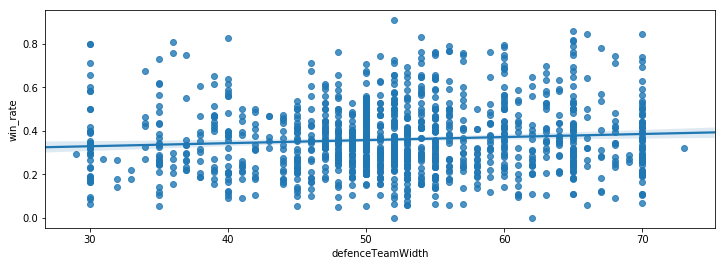

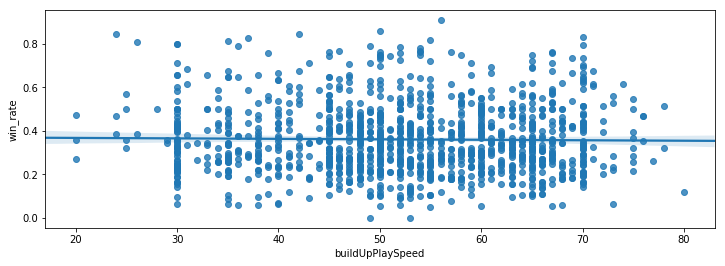

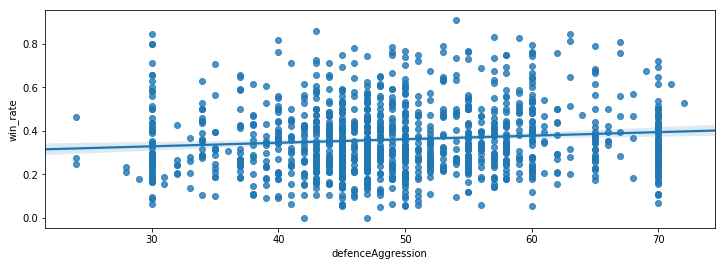

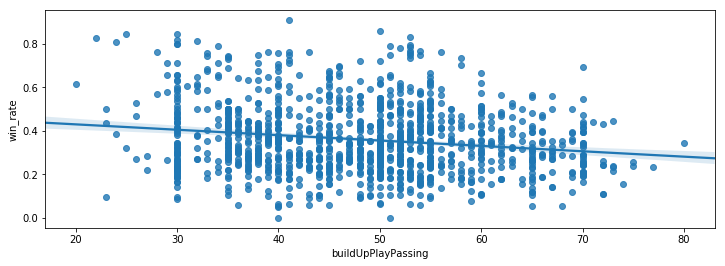

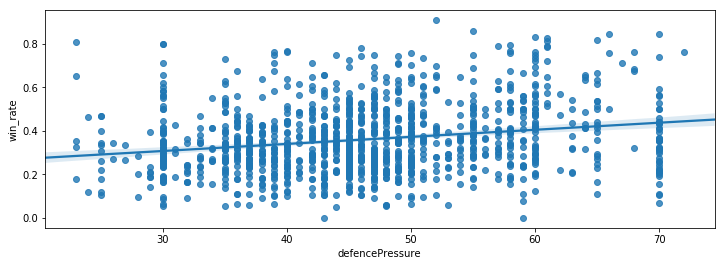

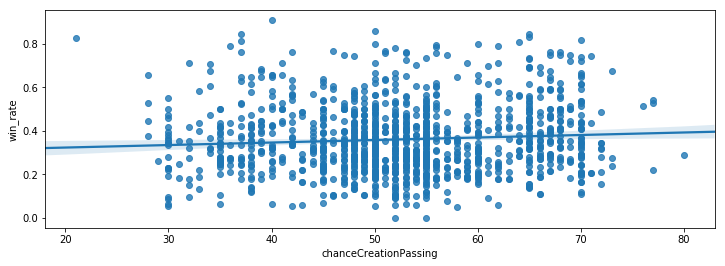

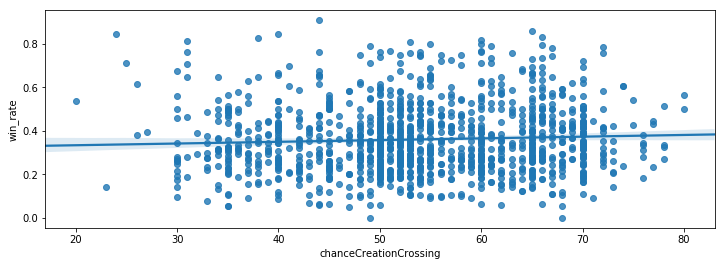

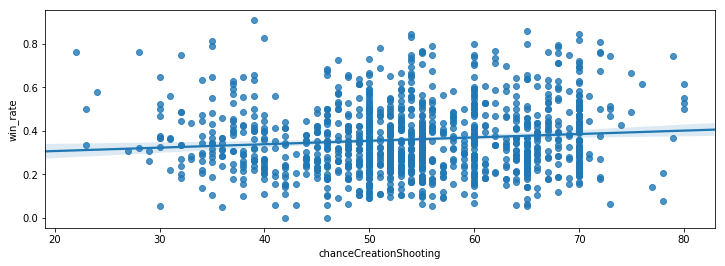

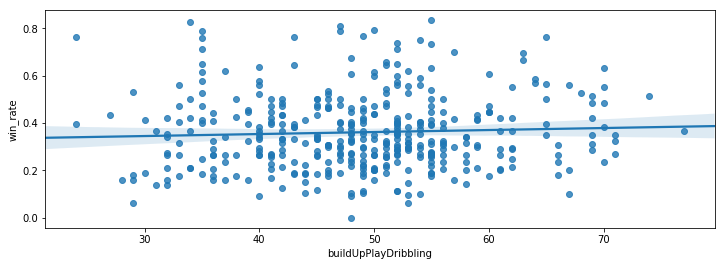

In [46]:
for var in numerical_vars:
    plt.figure(figsize=(12,4))
    sb.regplot(x=var, y="win_rate", data=df_team);

It seems `buildUpPlayPassing` is most negatively related to the win rate and  `defencePressure` is most positively related.

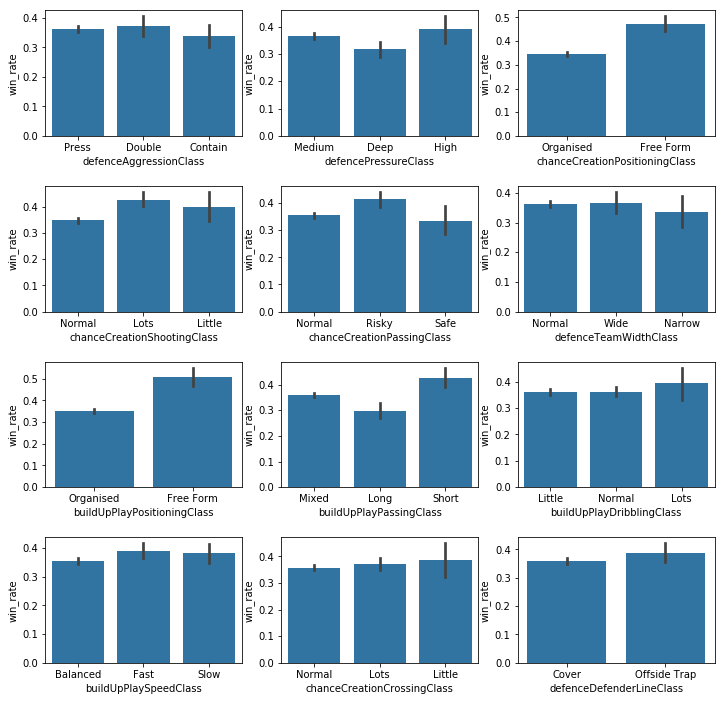

In [47]:
current_palette = sb.color_palette()
count = 1
fig = plt.figure(figsize=(12,12))
fig.tight_layout()
for var in cat_vars:
    fig.add_subplot(4, 3, count)
    sb.barplot(x=var, y="win_rate", data=df_team, color=current_palette[0])
    plt.subplots_adjust(hspace = .4)
    count = count+1

It seems `defencePressureClass`, `chanceCreationPositioningClass`, `buildUpPlayPositioningClass`, and `buildUpPlayPassingClass` can best explain the variations in the win rate.

<a id='conclusions'></a>
## Conclusions

1. Teams with lower `buildUpPlayPassing` score and higher `defencePressure` score are more likely to win. These two variables have higher prediction power than other numerical variables.
2. Teams with "Free Form" in both `chanceCreationPositioningClass` and `buildUpPlayPositioningClass` have a higher chance to win than their counterparts, i.e. those fall into the category of "Organised".

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0